# Работа Кашко Никиты, 2371
## Датасет представляет собой набор экономических характеристик, включая цену, на авокадо.
Взят с сайта https://www.kaggle.com/datasets/neuromusic/avocado-prices

## Атрибуты:
>Date - дата наблюдения

>AveragePrice - средняя цена одного авокадо

>type - обычные или органические

>year - Год

>Region - Город или регион наблюдений

>Total Volume - Общее количество проданных авокадо

>4046 - Количество проданных авокадо с кодом продукта 4046

>4225 - Количество проданных авокадо с кодом продукта 4225

>4770 - Количество проданных авокадо с кодом продукта 4770

>Total bags - Количество проданных упаковок

>Small bags - Колчиество проданных маленьких упаковок

>Large bags - Количество проданных больших упаковок


## Подключаем необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns #для хитмапы корреляции

## Прочитаем датасет при помощи метода read_csv, оставим только числовые значения

In [3]:
df = pd.read_csv('avocado.csv')
data = df.drop(df.columns[[0, 1, 11, 12, 13]], axis=1)
data.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0


## Выведем среднее значение и СКО средней цены на авокадо

In [4]:
print(pd.concat([data.mean(), data.std()], axis=1, keys=['Среднее', 'Отклонение']))

                    Среднее    Отклонение
AveragePrice       1.405978  4.026766e-01
Total Volume  850644.013009  3.453545e+06
4046          293008.424531  1.264989e+06
4225          295154.568356  1.204120e+06
4770           22839.735993  1.074641e+05
Total Bags    239639.202060  9.862424e+05
Small Bags    182194.686696  7.461785e+05
Large Bags     54338.088145  2.439660e+05
XLarge Bags     3106.426507  1.769289e+04


## Построим гистограмму распределения значений

array([[<Axes: title={'center': 'AveragePrice'}>,
        <Axes: title={'center': 'Total Volume'}>,
        <Axes: title={'center': '4046'}>],
       [<Axes: title={'center': '4225'}>,
        <Axes: title={'center': '4770'}>,
        <Axes: title={'center': 'Total Bags'}>],
       [<Axes: title={'center': 'Small Bags'}>,
        <Axes: title={'center': 'Large Bags'}>,
        <Axes: title={'center': 'XLarge Bags'}>]], dtype=object)

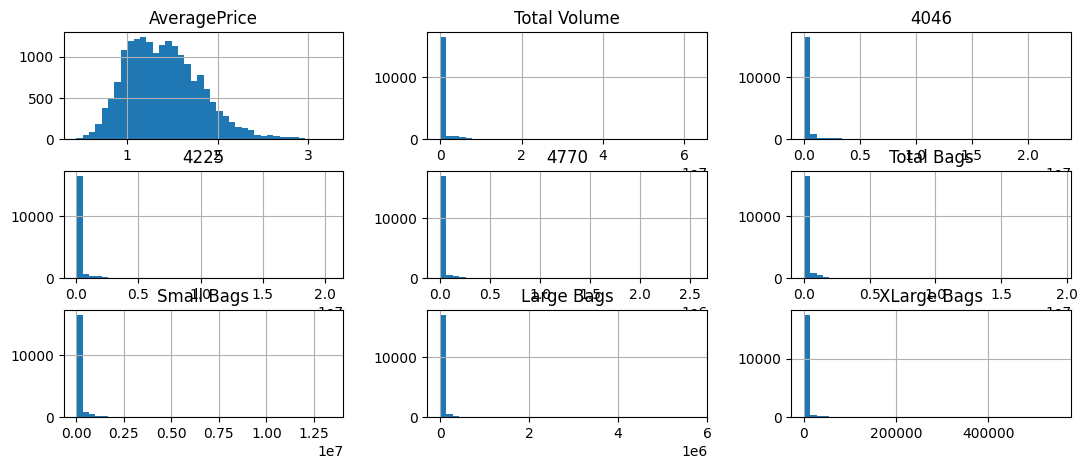

In [5]:
data.hist(figsize=(13, 5), bins=40)

### Выбросов не обнаружено, распределения напоминают нормальные, кроме Total Volume и 4046, в них наблюдаются выбросы, но незначительные
## Определим количество пропущенных значений

In [6]:
print(data.isnull().sum())

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
dtype: int64


### Пропущенных значений не наблюдается
## Посмотрим на корреляцию

<Axes: >

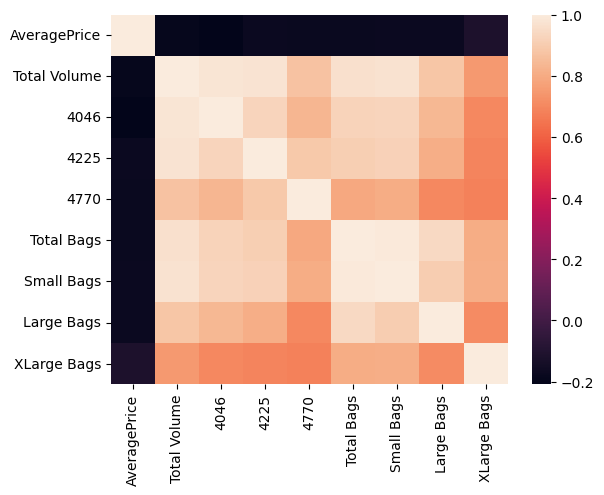

In [7]:
sns.heatmap(data.corr())

### В общем и целом в датасете много сильных зависимостей, которые, за исключением атрибута среднее стоимости, прямые.

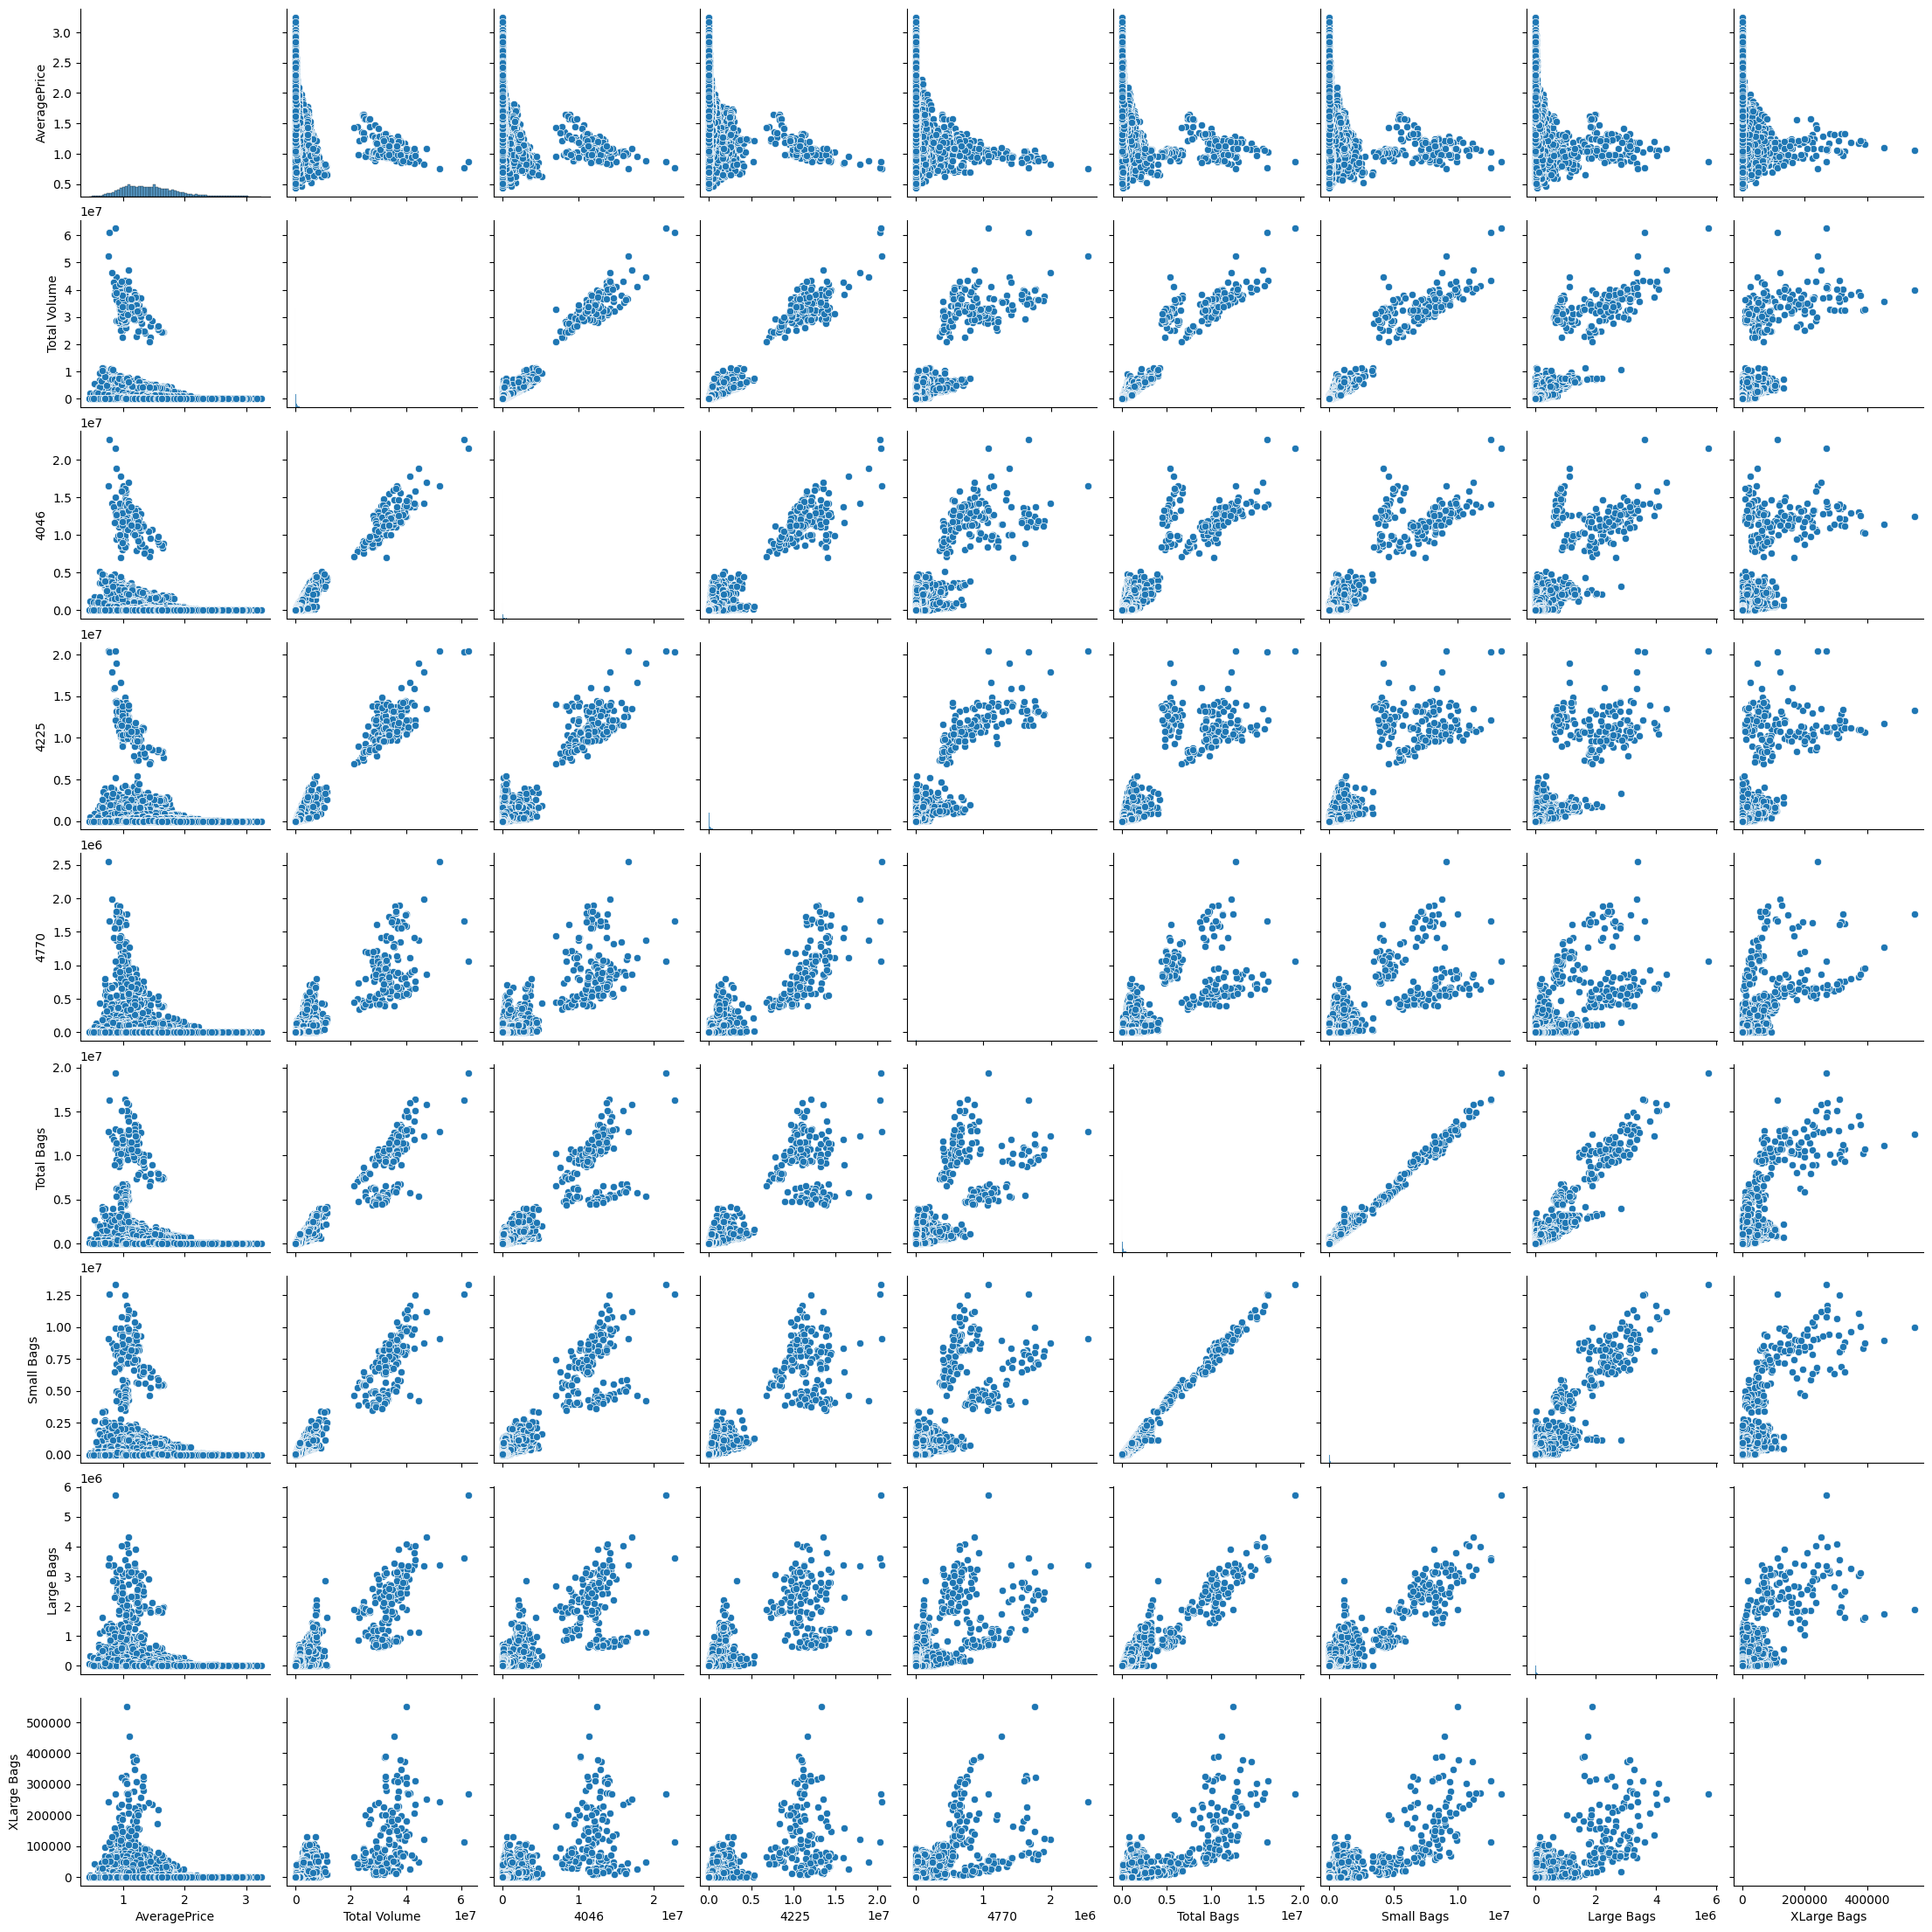

In [8]:
sns.pairplot(data)

### Из графиков рассеяния отлично видно, как коррелируют total bags и small bags - что, в общем-то, очевидно. Хорошо коррелирует и общее количество проданных авокадо с остальными атрибутами(что тоже в какой-то степени очевидно), что видно как из графиков рассеяния, так и из карты корреляции. 